## Importing Libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

from datetime import datetime
from datetime import timedelta

## Reading Data Set

In [3]:
variable_desc={
'product_id':'The key col to represent a unique product',
'Business Unit':'Level 1 of product hierarchy' ,
'Business Group':'Level 2 of product hierarchy',
'Major Product Group':'Level 3 of product hierarchy',
'Product Group':'Level 4 of product hierarchy',
'lineage':'Level 5 of product hierarchy',
'monthly_date':'date',
'month':'Month of year',
'avg_map_discount':'monthly discount planned for a longer period of time',
'discount_avg':'Monthly executed discount',
'price':'Item price',
'days_discount':'Ratio of days of the month that discount was executed',
'days_map_discount':'Ratio of days of the month that longer term discount was planne',
'sell_in_qty':'Total dollar amount for the items shipped to retailer',
'requested_qty':'Total dollar amount for the items that retailer requested to receive',
'discount_max':'Maximum monthly executed discount',
'max_map_discount':'Maximum monthly long term planned discount'}

variable_desc

{'product_id': 'The key col to represent a unique product',
 'Business Unit': 'Level 1 of product hierarchy',
 'Business Group': 'Level 2 of product hierarchy',
 'Major Product Group': 'Level 3 of product hierarchy',
 'Product Group': 'Level 4 of product hierarchy',
 'lineage': 'Level 5 of product hierarchy',
 'monthly_date': 'date',
 'month': 'Month of year',
 'avg_map_discount': 'monthly discount planned for a longer period of time',
 'discount_avg': 'Monthly executed discount',
 'price': 'Item price',
 'days_discount': 'Ratio of days of the month that discount was executed',
 'days_map_discount': 'Ratio of days of the month that longer term discount was planne',
 'sell_in_qty': 'Total dollar amount for the items shipped to retailer',
 'requested_qty': 'Total dollar amount for the items that retailer requested to receive',
 'discount_max': 'Maximum monthly executed discount',
 'max_map_discount': 'Maximum monthly long term planned discount'}

In [4]:
#Reading Data 
df=pd.read_csv('one_bu_test_train_dataset.csv')
print("Shape of Data : ", df.shape)
df.head(10)

Shape of Data :  (6671, 17)


,product_id,Business Unit,Business Group,Major Product Group,Product Group,lineage,monthly_date,month,avg_map_discount,discount_avg,price,days_discount,days_map_discount,sell_in_qty,requested_qty,discount_max,max_map_discount
0,534,2,9052,E43,3199,7131,4/1/2020,4,0.0,0.0,66.867930,0.0,0.0,417.000000,507.000000,0.0,0.0
1,534,2,9052,E43,3199,7131,12/1/2019,12,0.0,0.0,66.867930,0.0,0.0,87.000000,87.000000,0.0,0.0
2,534,2,9052,E43,3199,7131,2/1/2020,2,0.0,0.0,66.867930,0.0,0.0,12.428571,27.857143,0.0,0.0
3,534,2,9052,E43,3199,7131,3/1/2020,3,0.0,0.0,66.867930,0.0,0.0,78.000000,102.000000,0.0,0.0
4,534,2,9052,E43,3199,7131,11/1/2019,11,0.0,0.0,66.867930,0.0,0.0,19.714286,23.142857,0.0,0.0
5,534,2,9052,E43,3199,7131,1/1/2020,1,0.0,0.0,66.867930,0.0,0.0,194.571429,197.142857,0.0,0.0
6,534,2,9052,E43,3199,7131,10/1/2019,10,0.0,0.0,66.867930,0.0,0.0,34.285714,42.857143,0.0,0.0
7,534,2,9052,E43,3199,7131,5/1/2020,5,0.0,0.0,66.867930,0.0,0.0,349.714286,774.857143,0.0,0.0
8,786,2,9052,O35,3187,7701,10/1/2018,10,0.0,0.0,2.086858,0.0,0.0,3822.857143,3822.857143,0.0,0.0
9,786,2,9052,O35,3187,7701,7/1/2019,7,0.0,0.0,2.086858,0.0,0.0,10311.428570,9063.428571,0.0,0.0


**Observations**
* Need to convert monthly_date into date Dtype to work on it and extract additional date-time information
* Major product group might need conversion depending on it's usability

In [5]:
# Data columns and Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           6671 non-null   int64  
 1   Business Unit        6671 non-null   int64  
 2   Business Group       6671 non-null   int64  
 3   Major Product Group  6671 non-null   object 
 4   Product Group        6671 non-null   int64  
 5   lineage              6671 non-null   int64  
 6   monthly_date         6671 non-null   object 
 7   month                6671 non-null   int64  
 8   avg_map_discount     6671 non-null   float64
 9   discount_avg         6671 non-null   float64
 10  price                6671 non-null   float64
 11  days_discount        6671 non-null   float64
 12  days_map_discount    6671 non-null   float64
 13  sell_in_qty          6288 non-null   float64
 14  requested_qty        6288 non-null   float64
 15  discount_max         6671 non-null   f

In [6]:
# Converting Data Types - Monthly date to datetime format 
df['monthly_date']=pd.to_datetime(df['monthly_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6671 entries, 0 to 6670
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product_id           6671 non-null   int64         
 1   Business Unit        6671 non-null   int64         
 2   Business Group       6671 non-null   int64         
 3   Major Product Group  6671 non-null   object        
 4   Product Group        6671 non-null   int64         
 5   lineage              6671 non-null   int64         
 6   monthly_date         6671 non-null   datetime64[ns]
 7   month                6671 non-null   int64         
 8   avg_map_discount     6671 non-null   float64       
 9   discount_avg         6671 non-null   float64       
 10  price                6671 non-null   float64       
 11  days_discount        6671 non-null   float64       
 12  days_map_discount    6671 non-null   float64       
 13  sell_in_qty          6288 non-nul

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,6671.0,659.009144,100.710695,493.00000,569.000000,657.000000,743.000000,839.000000
Business Unit,6671.0,2.000000,0.000000,2.00000,2.000000,2.000000,2.000000,2.000000
Business Group,6671.0,9051.999101,0.042406,9050.00000,9052.000000,9052.000000,9052.000000,9052.000000
Product Group,6671.0,3910.323040,1655.815943,3108.00000,3185.000000,3190.000000,3192.000000,7757.000000
lineage,6671.0,7414.798681,246.263459,6979.00000,7222.000000,7403.000000,7584.000000,7939.000000
month,6671.0,6.063858,3.457187,1.00000,3.000000,6.000000,9.000000,12.000000
avg_map_discount,6671.0,0.012053,0.046340,0.00000,0.000000,0.000000,0.000000,0.224719
discount_avg,6671.0,0.006888,0.037073,0.00000,0.000000,0.000000,0.000000,0.298433
price,6671.0,6.971916,11.344042,1.22472,1.885633,2.788491,7.252670,72.614650
days_discount,6671.0,0.022108,0.132349,0.00000,0.000000,0.000000,0.000000,1.000000


In [8]:
print("Total Number of Records : ",df.shape[0])
print("Distinct Number of products : ",df.product_id.nunique())
print("Distinct Number of Business Unit : ",df['Business Unit'].nunique())
print("Distinct Number of Business Group : ",df['Business Group'].nunique())
print("Distinct Number of MPC : ",df['Major Product Group'].nunique())
print("Distinct Number of Product Groups : ",df['Product Group'].nunique())
print("Distinct Number of Lineage : ",df['lineage'].nunique())
print("Distinct Number of Months : ",df.monthly_date.nunique())

Total Number of Records :  6671
Distinct Number of products :  337
Distinct Number of Business Unit :  1
Distinct Number of Business Group :  2
Distinct Number of MPC :  6
Distinct Number of Product Groups :  16
Distinct Number of Lineage :  337
Distinct Number of Months :  32


In [9]:
#Count of Missing Values
print("\nMissing Values : ")
print(df.isnull().sum())

print("\n% Missing Values : ")
print(df.isnull().sum()/len(df))


Missing Values : 
product_id               0
Business Unit            0
Business Group           0
Major Product Group      0
Product Group            0
lineage                  0
monthly_date             0
month                    0
avg_map_discount         0
discount_avg             0
price                    0
days_discount            0
days_map_discount        0
sell_in_qty            383
requested_qty          383
discount_max             0
max_map_discount         0
dtype: int64

% Missing Values : 
product_id             0.000000
Business Unit          0.000000
Business Group         0.000000
Major Product Group    0.000000
Product Group          0.000000
lineage                0.000000
monthly_date           0.000000
month                  0.000000
avg_map_discount       0.000000
discount_avg           0.000000
price                  0.000000
days_discount          0.000000
days_map_discount      0.000000
sell_in_qty            0.057413
requested_qty          0.057413
discount

**Observations**
* Dates are from December 2017 to July 2020
* Sell in quantity Median value is 613 and Max is 113,074. Need to check at product level to look at Outliers

# EDA

In [11]:
# Check for no. of products in Each group

df2 = df.groupby(['Business Unit','Business Group','Major Product Group','Product Group'])\
.product_id.nunique()

df2

Business Unit  Business Group  Major Product Group  Product Group
2              9050            E43                  3199              1
                               O35                  7746              1
               9052            E41                  3108              1
                                                    3182              2
                                                    3183              6
                                                    3184             22
                               E42                  3192             88
                               E43                  3199              2
                                                    7756              5
                                                    7757              2
                               O35                  3185             77
                                                    3187             32
                                                    7745             1

**Observations**
* Uneven distribution of products in Product groups
* In order to determine level of analysis, we should plot some data and look at results
* No 1:1 mapping on Major Product group and Business Group; Major Product group E43 present in both Business group 9050 and 9052

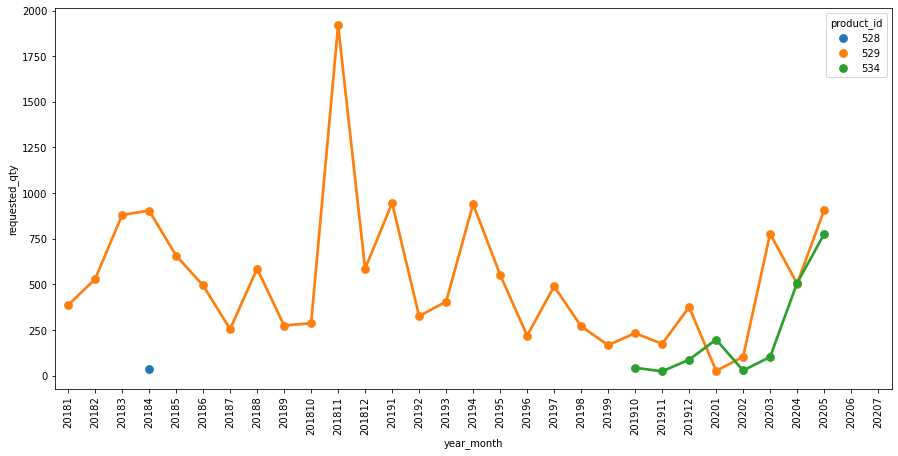

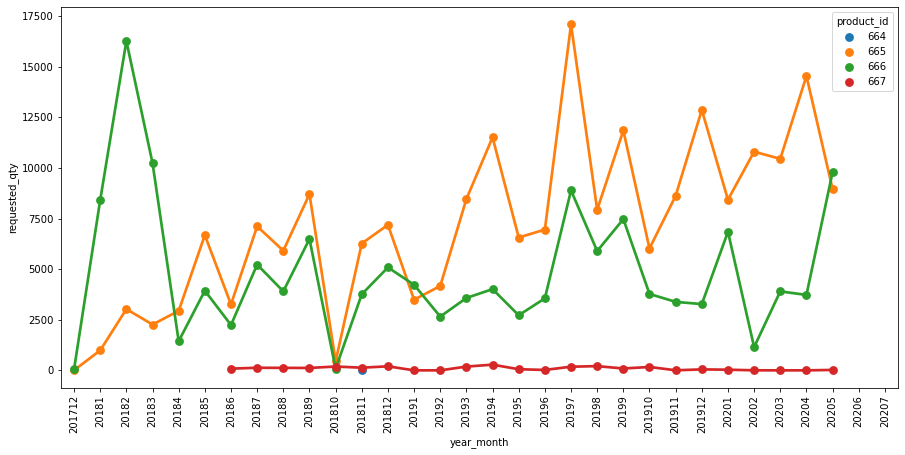

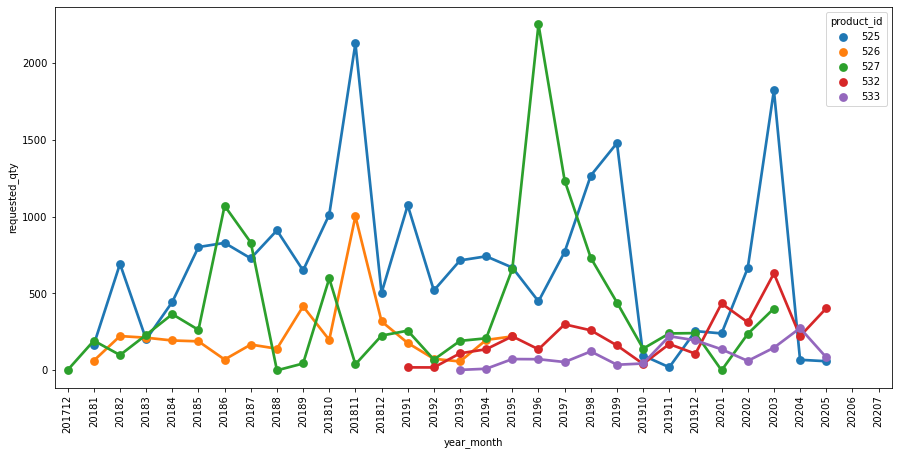

In [12]:
# Plot trends for quantity ordered to check if Products in 1 Product group behave similar or not. 

# Extracting year and year-month for easy reading of dates
df['year'] = df.monthly_date.dt.year
df['year_month'] = df['year'].astype(str) + df['month'].astype(str)

# Randomly 3 Product Groups plotted

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
df2 = df[df['Product Group'] == 3199].sort_values(by='monthly_date')
sns.pointplot(x='year_month', y='requested_qty', hue = 'product_id',  data=df2)
plt.show()

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
df2 = df[df['Product Group'] == 3188].sort_values(by='monthly_date')
sns.pointplot(x='year_month', y='requested_qty', hue = 'product_id',  data=df2)
plt.show()

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
df2 = df[df['Product Group'] == 7756].sort_values(by='monthly_date')
sns.pointplot(x='year_month', y='requested_qty', hue = 'product_id',  data=df2)
plt.show()

In [50]:
# Get no. of months data is poulated for each product

df_prod_months = df.groupby(['product_id'])['monthly_date'].count().sort_values(ascending = False).reset_index()

df_months_prod = df_prod_months.groupby(['monthly_date'])['product_id'].count().reset_index()
df_months_prod = df_months_prod.sort_values(by = 'monthly_date', ascending = False)
df_months_prod.head()


,monthly_date,product_id
30,32,44
29,31,33
28,30,22
27,29,10
26,28,8


<AxesSubplot:xlabel='monthly_date', ylabel='product_id'>

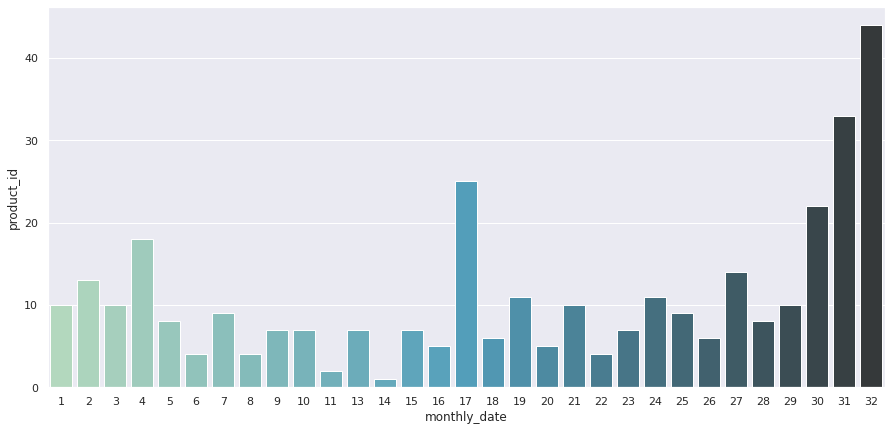

In [51]:
sns.set(rc={'figure.figsize':(15,7)})
sns.barplot(x='monthly_date',y='product_id',data=df_months_prod,palette='GnBu_d')

In [56]:
df_greater_than_24 = df_prod_months[df_prod_months['monthly_date'] > 25]
print('The number of products having atleast 2 years of data (last 2 months is missing so 26):', df_greater_than_24.shape[0])

percentage = (df_greater_than_24.shape[0] / df_prod_months.shape[0]) * 100
print("Percentage of products having atleast 2 years of data:", round(percentage, 2), '%')

The number of products having atleast 2 years of data (last 2 months is missing so 26): 137
Percentage of products having atleast 2 years of data: 40.65 %


**Observations**
* Only 40.65% products have enough data to run a forecasting algorithm. Industry standard is 3-5 years, but to take into account seasonality and trends, 3+ years data is required
* In order to determine level of analysis, we may look at higher level than product level

In [68]:
# Get no. of months data is poulated for each product

var = 'Product Group'

def months_data(var):
    df2 = df[[var,"monthly_date"]]
    df2.drop_duplicates(inplace=True)

    df_prod_months = df2.groupby([var])['monthly_date'].count().sort_values(ascending = False).reset_index()
    df_months_prod = df_prod_months.groupby(['monthly_date'])[var].count().reset_index()
    df_months_prod = df_months_prod.sort_values(by = 'monthly_date', ascending = False)

    df_greater_than_24 = df_prod_months[df_prod_months['monthly_date'] > 25]
    print('The number of products having atleast 2 years of data (last 2 months is missing so 26):', df_greater_than_24.shape[0])

    percentage = (df_greater_than_24.shape[0] / df_prod_months.shape[0]) * 100
    print("Percentage of products having atleast 2 years of data:", round(percentage, 2), '% \n')
    

print('Product Group \n')
months_data('Product Group')

print('Major Product Group \n')
months_data('Major Product Group')

Product Group 

The number of products having atleast 2 years of data (last 2 months is missing so 26): 15
Percentage of products having atleast 2 years of data: 93.75 % 

Major Product Group 

The number of products having atleast 2 years of data (last 2 months is missing so 26): 6
Percentage of products having atleast 2 years of data: 100.0 % 



/opt/conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


**Observations**
* 93.75% of product groups have data for 2+ years
* All Major product groups have 2+ years data making it ideal level for Forecast

## Rollups at various levels

In [13]:
varlist=['avg_map_discount',
         'discount_avg',
         'price', 
         'days_discount',
         'days_map_discount',
         'sell_in_qty', 
         'requested_qty',
         'discount_max',
         'max_map_discount']

varlist

['avg_map_discount',
 'discount_avg',
 'price',
 'days_discount',
 'days_map_discount',
 'sell_in_qty',
 'requested_qty',
 'discount_max',
 'max_map_discount']

### Monthly Data

(32, 9)


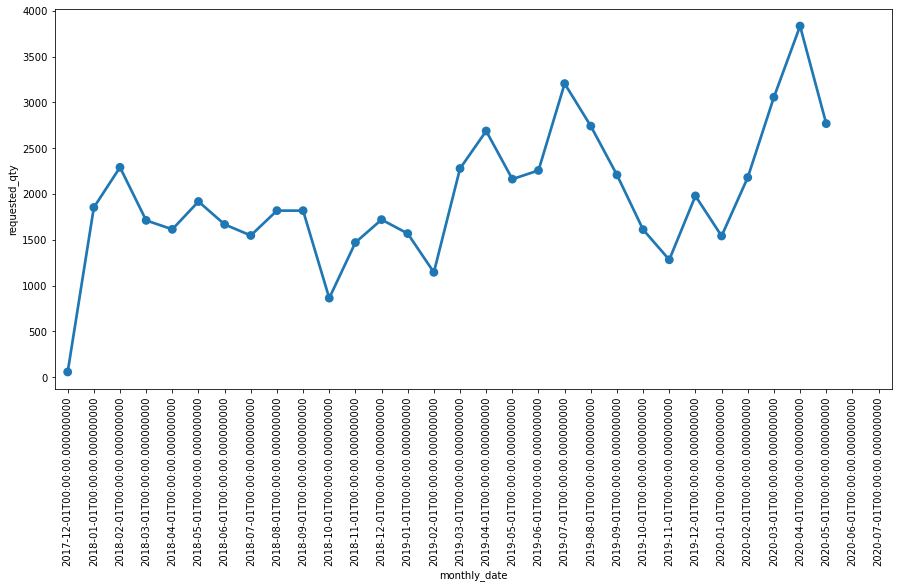

In [14]:
monthly_date_rollup=pd.DataFrame(df.groupby(['monthly_date']).mean())[varlist]
print(monthly_date_rollup.shape)
monthly_date_rollup = monthly_date_rollup.reset_index()

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.pointplot(x='monthly_date', y='requested_qty',  data=monthly_date_rollup)
plt.show()

### Monthly - Business Group Sales

(35, 9)


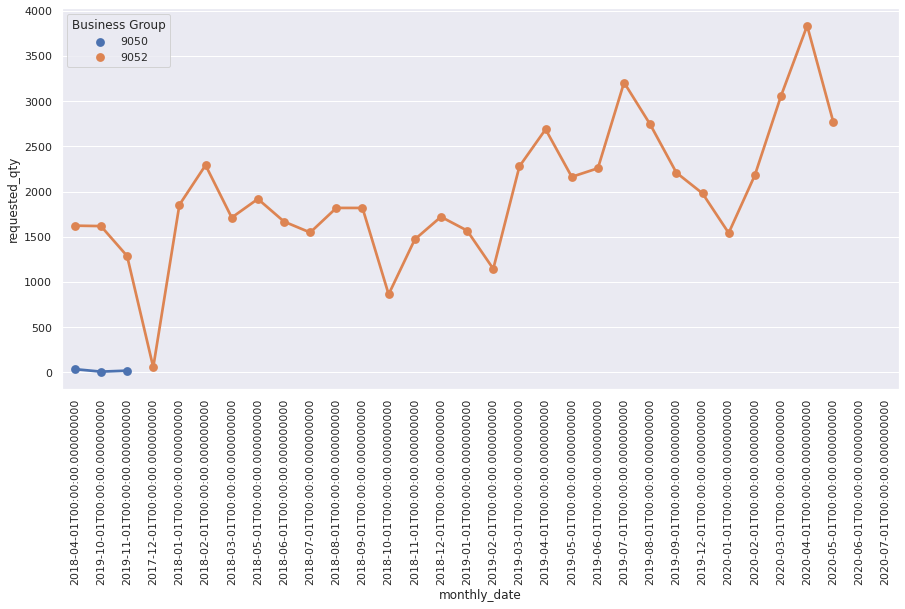

In [79]:
BG_monthly_date_rollup = pd.DataFrame(df.groupby(['Business Group','monthly_date']).mean())[varlist]
print(BG_monthly_date_rollup.shape)
BG_monthly_date_rollup = BG_monthly_date_rollup.reset_index()
BG_monthly_date_rollup.head()

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.pointplot(x='monthly_date', y='requested_qty',hue='Business Group', data=BG_monthly_date_rollup)
plt.show()

### Major Product Category

(195, 13)


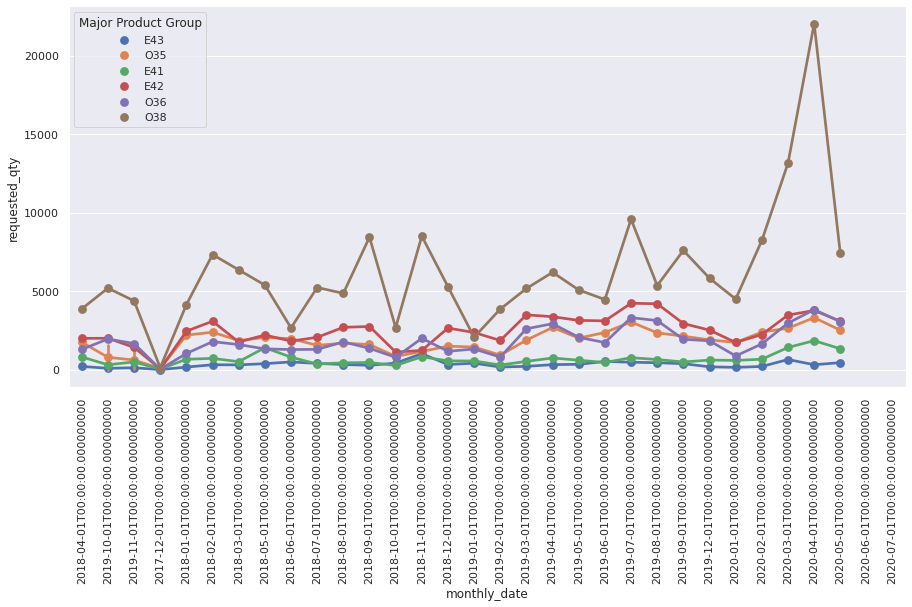

In [81]:
#Transaction_date wise analysis
MPG_monthly_date_rollup=pd.DataFrame(df.groupby(['Business Unit','Business Group','Major Product Group','monthly_date']).mean())[varlist]
MPG_monthly_date_rollup.reset_index(inplace=True)
print(MPG_monthly_date_rollup.shape)

plt.figure(figsize=(15,7))
plt.xticks(rotation=90)
sns.pointplot(x='monthly_date', y='requested_qty',hue='Major Product Group', data=MPG_monthly_date_rollup)
plt.show()

(477, 11)


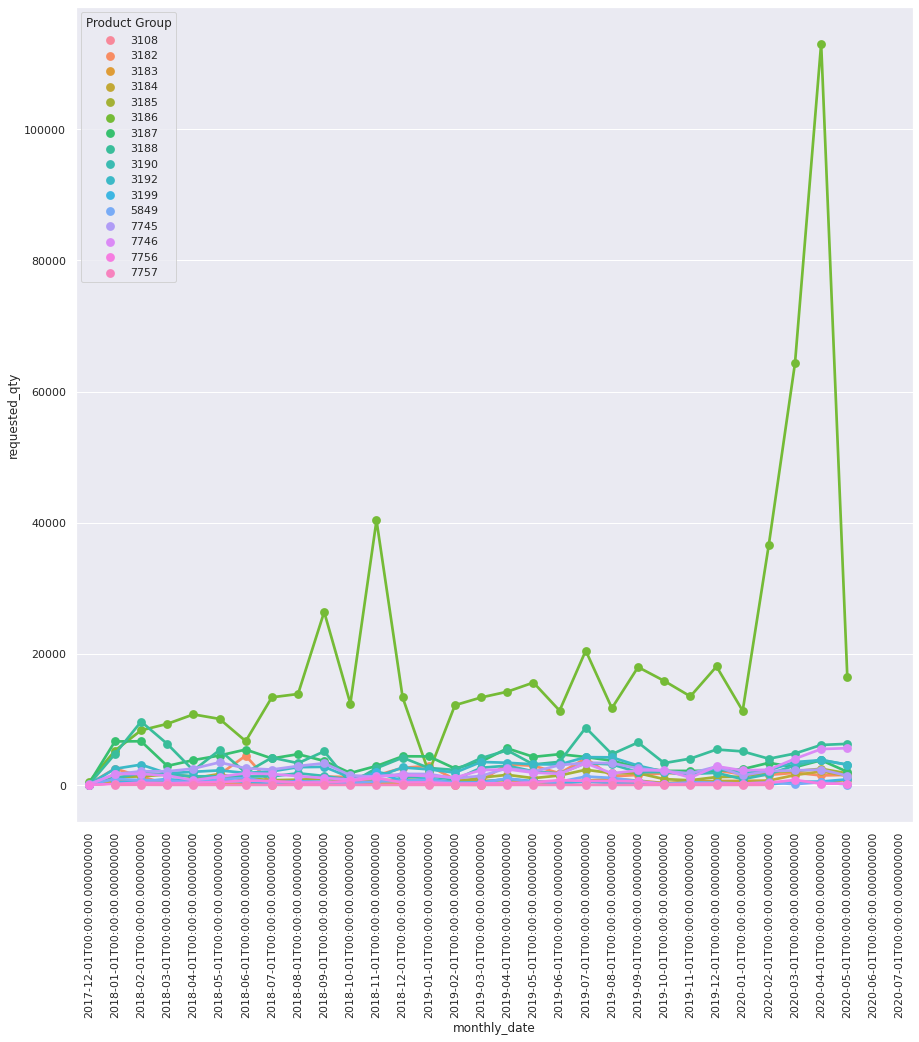

In [82]:
#Transaction_date wise analysis
PG_monthly_date_rollup=pd.DataFrame(df.groupby(['Product Group','monthly_date']).mean())[varlist]
PG_monthly_date_rollup.reset_index(inplace=True)
print(PG_monthly_date_rollup.shape)

plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.pointplot(x='monthly_date', y='requested_qty',hue='Product Group', data=PG_monthly_date_rollup)
plt.show()

**Observations**
* Looking at Major Product Groups and Product Groups graph trend, we can see some outliers 
* Mean values for Major Product group O38 shows lot of fluctuations than other Major Product Group

In [89]:
# Correlation between different variables
df_corr = df[['avg_map_discount',
                'discount_avg',
                'price',
                'days_discount',
                'days_map_discount',
                'sell_in_qty',
                'requested_qty',
                'discount_max',
                'max_map_discount']]
correlation = df_corr.corr() # creating a 2-D Matrix with correlation plots
correlation

,avg_map_discount,discount_avg,price,days_discount,days_map_discount,sell_in_qty,requested_qty,discount_max,max_map_discount
avg_map_discount,1.000000,0.625403,0.067669,0.636232,0.854355,-0.035635,-0.022804,0.625403,1.000000
discount_avg,0.625403,1.000000,0.038431,0.878506,0.510458,-0.006512,0.001975,1.000000,0.625403
price,0.067669,0.038431,1.000000,0.040256,0.061525,-0.085400,-0.072944,0.038431,0.067669
days_discount,0.636232,0.878506,0.040256,1.000000,0.575469,-0.010317,-0.000795,0.878506,0.636232
days_map_discount,0.854355,0.510458,0.061525,0.575469,1.000000,-0.037396,-0.027169,0.510458,0.854355
sell_in_qty,-0.035635,-0.006512,-0.085400,-0.010317,-0.037396,1.000000,0.928960,-0.006512,-0.035635
requested_qty,-0.022804,0.001975,-0.072944,-0.000795,-0.027169,0.928960,1.000000,0.001975,-0.022804
discount_max,0.625403,1.000000,0.038431,0.878506,0.510458,-0.006512,0.001975,1.000000,0.625403
max_map_discount,1.000000,0.625403,0.067669,0.636232,0.854355,-0.035635,-0.022804,0.625403,1.000000


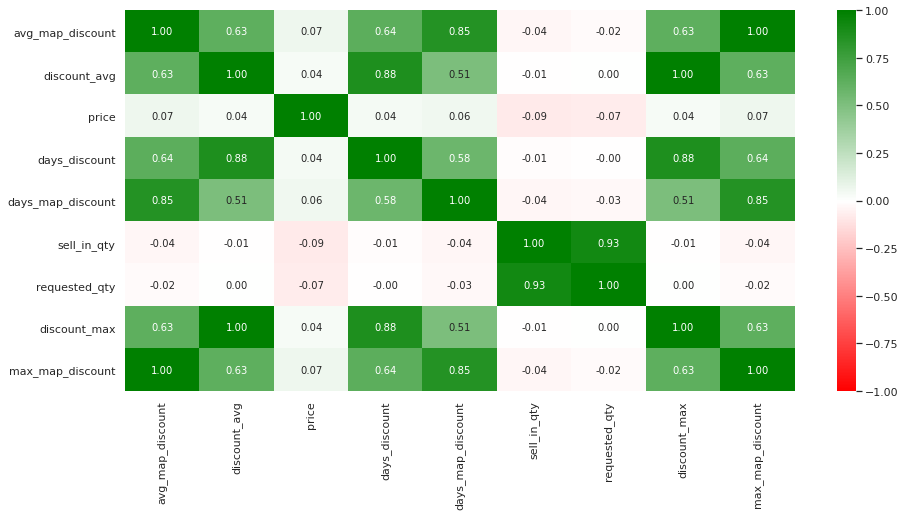

In [90]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('GreenRed', ['red', 'white', 'green'])
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap=cmap)
plt.show()

**Observations**
* Sell In quantity and Requested quantity have no correlation with any other variable
* It would have been interesting to see the effect of these variables on requested quantity had there been any effect

# Conclusions

* In order to define level of analysis, we need to ask the Question what is the intent behind forecasting.
* Product level is too granular. 40% of products have enough historical data (>2 years) for forecasting. 93% of Major Product groups have enough data for forecasting
* If we are to do product level forecasting, moving averages - Last Quarter quantity is the best approach. If we are forming one big model, we need to choose higher level Major product Group or Business Group


In [2]:
!jupyter nbconvert --to html Code1_EDA.ipynb

[NbConvertApp] Converting notebook Code1_EDA.ipynb to html
